# Лабораторная работа №3: Регрессионный анализ

Выполнил студент группы 1384 Кондратенко Константин. Вариант 6.



## Цель работы
Получить теоретические знания о методе наименьших квадратов, получить практические навыки работы с МНК, функцией регрессии и регрессионным анализом.

## Основные теоретические положения
****
**Регрессия**

Регрессия имеет вид: $ Y = X\overrightarrow{\beta} + вектор \ ошибок $  
Линейная регрессия имеет вид: $ Y = \beta_0 + X\beta_1$  
Квадратичная регрессия имеет вид: $ Y = \beta_0 + X\beta_1 +  X^2\beta_2$  
$\overrightarrow{\beta} = (XX^T)^{-1}XY$  
$r = rank(X)$, тогда несмещенна оценка дисперсии $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$  
Вектор ошибок - разница между значением Y и значением модели регрессии ($X^T\beta$)  
****
**МНК**  
Основная идея МНК - минимизация векторая ошибок регресионных моделей
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

Нормальные уравнения: $XX^{\intercal}\beta=XY$

Решение системы нормальных уравнений: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$

****
Несмещённая **оценка дисперсии** $(s^{2})$

$r = rank(X)$, тогда несмещенна оценка дисперсии $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$  
****
**Доверительный интервал**  
$\psi = C^T \beta  \\
\frac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} \\
x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} \\
b_\psi = C^T (XX^T)^{-1}C \\
 P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

Искомый интервал: $ [\widehat \psi - x_{\alpha}s\sqrt{b} ; \widehat \psi + x_{\alpha}s\sqrt{b}] $
****
**Уравнение доверительного эллипсоида**  
$A_{\alpha}=\left\{ \overrightarrow{X}:(\overrightarrow{X}-\widehat{\psi})^{\intercal}B^{-1}(\overrightarrow{X}-\widehat{\psi})\le qS^{2}X_{\alpha} \right\}$

****

**F-критерий**

$F=\frac{MSR}{MSE} \\ MSR - среднеквадратичное \ отклонение \ отклонение \\ MSE -  среднеквадратичное \ отклонение\  ошибки $  

Высчитывается критическиое значение -  квантиль распределения Фишера с заданными степенями свободы для заданного уровня доверия

Если F превосходит найденный квантиль, то зависимость есть, иначе нет.

## Постановка задачи
Результаты статистического эксперимента представлены в виде таблицы двух переменных. Требуется оценить характер завсимости или незавсимости переменной Y
 от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


**Init libs**

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randint
from scipy.stats import linregress
from scipy import stats
from matplotlib.patches import Ellipse

**Init sample**

In [32]:
y_str = '9.74 14.15 24.22 5.44 23.72 1.67 8.48 12.16 20.26 9.05 6.46 1.50 11.88 31.71 23.14 6.29 9.80 6.98 3.61 9.77 33.85 7.69 5.65 13.46 21.17 21.94 6.68 8.42 5.29 0.74 5.62 15.17 14.74 25.52 6.62 18.24 10.99 7.09 0.91 12.34 8.18 12.13 14.70 12.03 12.77 9.22 3.99 8.85 8.69 13.72'
x_str = '6 3 5 4 7 6 2 2 3 3 4 7 5 4 6 3 6 5 2 3 3 4 6 6 7 5 4 5 8 6 2 4 5 6 6 3 5 5 5 5 4 6 7 6 2 6 7 6 8 4'

y_str = y_str.split()
x_str = x_str.split()

y = np.array([float(val) for val in y_str])
x = np.array([int(val) for val in x_str])

alpha = .2
h = 3.1

### Задание 1

Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметром сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Регрессия имеет вид: $ Y = X\overrightarrow{\beta} + вектор \ ошибок $

Линейная регрессия имеет вид: $ Y = \beta_0 + X\beta_1$

$\overrightarrow{\beta} = (XX^T)^{-1}XY$

Найдем значения $\overrightarrow{\beta}$, а с помощью этих коэффициентов построим график линейной модели:

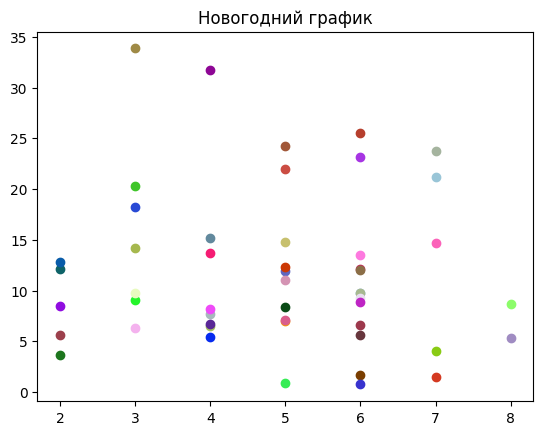

E_x = 4.84 
E_y = 11.728800000000001
y = 13.272-0.319x


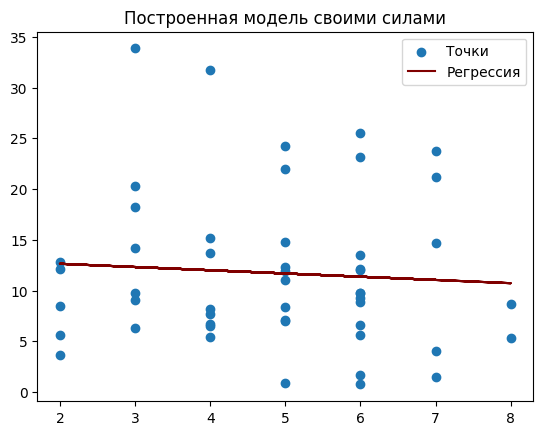

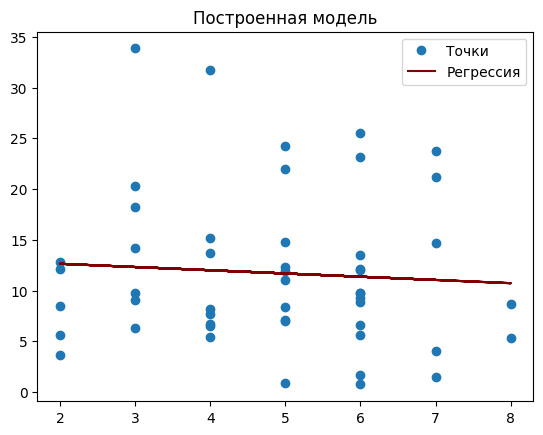

Визуально все здорово!
Однако стоит отметить что распределение невозможно описать линейной функцией


In [33]:

for i in range(len(x)):
  plt.scatter(x[i], y[i], c="#" + f"{randint(0, 0xFFFFFF):06x}")
plt.title("Новогодний график")
plt.show()

E_x = np.mean(x)
E_y = np.mean(y)

print(f'E_x = {E_x} \nE_y = {E_y}')

x2  = np.array([ [1 for i in range(50)], [int(val) for val in x_str] ])


beta_list = np.dot(np.dot(np.linalg.inv(np.dot(x2, x2.T)), x2), y)
print(f'y = {round(beta_list[0],3)}{round(beta_list[1],3)}x')


regression_y = np.dot(x2.T, beta_list)
plt.scatter(x, y, label='Точки')
plt.plot(x, regression_y, 'maroon', label='Регрессия')
plt.title("Построенная модель своими силами")
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * np.array(x) + intercept
plt.plot(x, y, 'o', label='Точки')
plt.plot(x, line, 'maroon', label='Регрессия')
plt.title("Построенная модель")
plt.legend()
plt.show()

print("Визуально все здорово!\nОднако стоит отметить что распределение невозможно описать линейной функцией")


### Задание 2
Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha \ по \ \chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

$r = rank(X)$, тогда несмещенна оценка дисперсии $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$

Вектор ошибок - разница между значением Y и значением модели регрессии ($X^T\beta$)

Оценка дисперсии s^2 = 58.745
Вектор ошибок: [ -1.61884945   1.83438188  12.54222766  -6.55669523  12.68007344
  -9.68884945  -4.154541    -0.474541     7.94438188  -3.26561812
  -5.53669523  -9.53992656   0.20222766  19.71330477  11.78115055
  -6.02561812  -1.55884945  -4.69777234  -9.024541    -2.54561812
  21.53438188  -4.30669523  -5.70884945   2.10115055  10.13007344
  10.26222766  -5.31669523  -3.25777234  -5.43100367 -10.61884945
  -7.014541     3.17330477   3.06222766  14.16115055  -4.73884945
   5.92438188  -0.68777234  -4.58777234 -10.76777234   0.66222766
  -3.81669523   0.77115055   3.66007344   0.67115055   0.135459
  -2.13884945  -7.04992656  -2.50884945  -2.03100367   1.72330477]


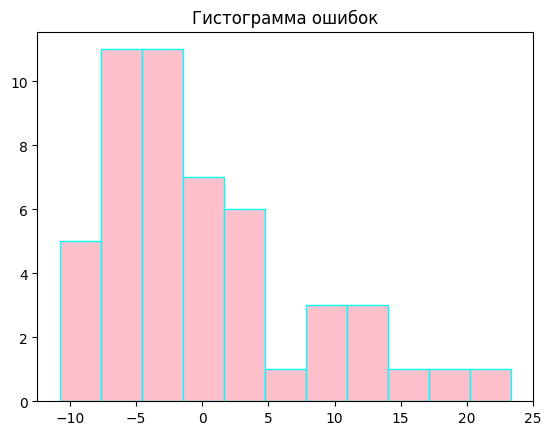

Отклоняем гипотезу о нормальности ошибок, т.к. p_value (0.008) < alpha (0.2)
p_value по Калмагорову = 3.861130051328947e-11


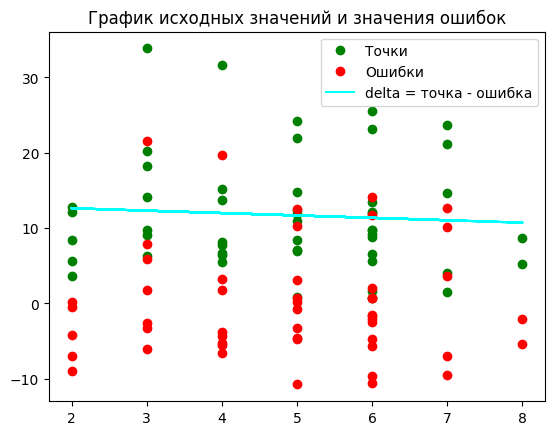

Визуально распределение ошибок очень значительно отличаются от нормального 
Также стоит отметить низкое значение p_value по Колмогорову (3.861130051328947e-11)


In [34]:
s2 = np.dot((y - np.dot(x2.T, beta_list)).T, (y - np.dot(x2.T, beta_list))) / (len(y) - 2)
print(f'Оценка дисперсии s^2 = {round(s2,3)}')

errors = y- np.dot(x2.T, beta_list)
print(f'Вектор ошибок: {errors}')
bins_list = np.arange(min(errors), max(errors) + h, h)
hist = plt.hist(errors, bins=bins_list, edgecolor='aqua', color='pink')[0]
plt.title('Гистограмма ошибок')
plt.show()

chi2_stat, p_value = stats.normaltest(errors)

print(f'Отклоняем гипотезу о нормальности ошибок, т.к. p_value ({round(p_value, 3)}) < alpha ({alpha})') if p_value < alpha else print(f'Принимаем гипотезу о нормальности ошибок, т.к. p_value ({round(p_value, 3)}) >= alpha ({alpha})')

kstest_st, p_value = stats.kstest(errors, 'norm')
print(f'p_value по Калмагорову = {p_value}')
plt.plot(x, y, 'o', label='Точки', color='green')
plt.plot(x, errors, 'o', label='Ошибки', color='red')
delta = y-errors
plt.plot(x, delta, label='delta = точка - ошибка', color='aqua')
plt.legend()
plt.title('График исходных значений и значения ошибок')
plt.show()

print(f'Визуально распределение ошибок очень значительно отличаются от нормального \nТакже стоит отметить низкое значение p_value по Колмогорову ({p_value})')



### Задание 3
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0 \ и \ \beta_1$ уровня доверия 1 − $\alpha$. Построить доверительный эллипс уровня доверия $ 1  − \alpha \ для \ (\beta_0, \beta_1)$ (вычислить его полуоси).


**Доверительный интервал:**
$\psi = C^T \beta  \\
\frac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} \\
x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} \to x_\alpha =  1.299\\
b_\psi = C^T (XX^T)^{-1}C \\
 P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

Искомый интервал: $ [\widehat \psi - x_{\alpha}s\sqrt{b} ; \widehat \psi + x_{\alpha}s\sqrt{b}] $

Расчет Д.И. $\beta_0$  

In [35]:
C = np.array([1, 0])
psy = np.dot(C.T, beta_list)
print(f'psy : {round(psy,3)}')
x_a = stats.t(len(y) - 2).ppf(1-alpha/2)
print(f'x_a : {round(x_a,3)}')
b_psy = np.dot(np.dot(C.T, np.linalg.inv(np.dot(x2, x2.T))), C)
print(f'b_psy : {round(b_psy,3)}')

print(f'Искомый интервал: [{round(beta_list[0]-x_a*np.sqrt(s2*b_psy), 3)}; {round(beta_list[0]+x_a*np.sqrt(s2*b_psy),3)}]. \n1-alpha = {1-alpha}')

psy : 13.272
x_a : 1.299
b_psy : 0.199
Искомый интервал: [8.827; 17.718]. 
1-alpha = 0.8


Расчет Д.И. $\beta_1$

In [36]:
C = np.array([0, 1])
psy = np.dot(C.T, beta_list)
print(f'psy : {round(psy,3)}')
x_a = stats.t(len(y) - 2).ppf(1-alpha/2)
print(f'x_a : {round(x_a,3)}')
b_psy = np.dot(np.dot(C.T, np.linalg.inv(np.dot(x2, x2.T))), C)
print(f'b_psy : {round(b_psy,3)}')

print(f'Искомый интервал: [{round(beta_list[1]-x_a*np.sqrt(s2*b_psy), 3)}; {round(beta_list[1]+x_a*np.sqrt(s2*b_psy),3)}]. \n1-alpha = {1-alpha}')

psy : -0.319
x_a : 1.299
b_psy : 0.008
Искомый интервал: [-1.19; 0.552]. 
1-alpha = 0.8


**Построение эллипса**


In [37]:
E_val, E_vec = np.linalg.eig(np.dot(x2, x2.T))
x_a = stats.f(2, len(y) - 2).ppf(1 - alpha)
se_maj = 2*s2*x_a/E_val[0]
se_min = 2*s2*x_a/E_val[1]
sep = 50*'_'
print(f'Большая полуось = {se_maj}')
print(f'Малая полуось = {se_min}')
print(f'{sep}\nСобственные числа:\n {E_val}\n{sep}\nСобственные вектора:\n {E_vec}')

Большая полуось = 40.3105572178246
Малая полуось = 0.14517774612539033
__________________________________________________
Собственные числа:
 [   4.85173024 1347.14826976]
__________________________________________________
Собственные вектора:
 [[-0.98303861 -0.18339873]
 [ 0.18339873 -0.98303861]]


Полуоси выведены. Теперь запишем уравнение эллипса  
$ \vec{x}= P(\hat{\psi} - \psi) = \pmatrix{ -0.983 & 0.183 \\ 0.183 &  -0.983 }
 \pmatrix{ 13.272 - \beta_0 \\ -0.319 - \beta_1 } =
 \pmatrix{ -13.105 + 0.983\beta_0 - 0.183\beta_1 \\
  2.742 - 0.183\beta_0 + 0.983\beta_1 }$


$ \frac{ (-13.105 + 0.983\beta_0 - 0.183\beta_1)^2}{40.31} + \frac{(2.742 - 0.183\beta_0 + 0.983\beta_1)^2 }{0.145} \leq 1 $


### Задание 4
Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Применим F-критерий

$F=\frac{MSR}{MSE} \\ MSR - среднеквадратичное \ отклонение \ отклонение \\ MSE -  среднеквадратичное \ отклонение\  ошибки $  

Высчитывается критическиое значение -  квантиль распределения Фишера с заданными степенями свободы для заданного уровня доверия

Если F превосходит найденный квантиль, то зависимость есть, иначе нет


In [38]:
MSE = np.sum((y - (beta_list[0] + beta_list[1] * x)) ** 2) / (len(y) - 2)
MSR = np.sum((beta_list[0] + beta_list[1] * x - np.mean(y)) ** 2) / 2

f_value = MSR / MSE
f_value_critical = stats.f.ppf(1 - alpha, 2, len(y) - 2)
print(f'Y зависит от X, т.к. f_value > f_value_critical ({round(f_value, 3)} > {round(f_value_critical, 3)})') if f_value > f_value_critical else print(f'Y не зависит от X, т.к. f_value < f_value_critical ({round(f_value, 3)}<{round(f_value_critical, 3)}) ')

Y не зависит от X, т.к. f_value < f_value_critical (0.113<1.665) 


### Задание 5
Сформулировать модель, включающую дополнительный член $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить полученную регрессионную зависимость.

Регрессия имеет вид: $ Y = X\overrightarrow{\beta} + вектор \ ошибок $

Линейная регрессия имеет вид: $ Y = \beta_0 + X\beta_1 + X^2\beta_2$

$\overrightarrow{\beta} = (XX^T)^{-1}XY$

Найдем значения $\overrightarrow{\beta}$, а с помощью этих коэффициентов построим график квадратичной модели:

Регрессия y = -0.307x^2 + 2.589x + 7.205 


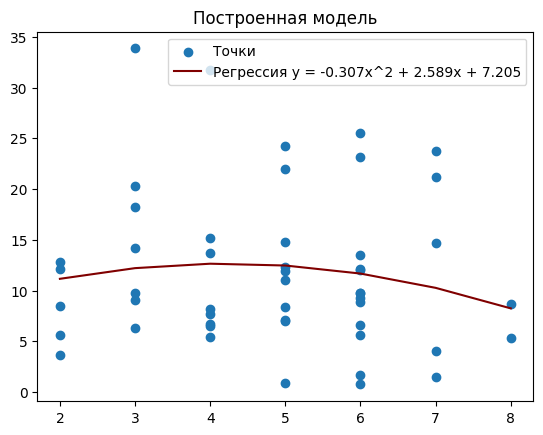

In [39]:
x3  = np.array([ [1 for i in range(50)], [int(val) for val in x_str], [int(val)**2 for val in x_str] ])
beta_list2 = np.dot(np.dot(np.linalg.inv(np.dot(x3, x3.T)), x3), y)

xs = np.sort(x)
regression_y = np.zeros(len(x))
for i in range(len(x)):
  regression_y[i] = beta_list2[0] + beta_list2[1] * xs[i] + beta_list2[2] * xs[i]**2
plt.scatter(x, y, label='Точки')
plt.plot(xs, regression_y, color='maroon', label=f'Регрессия y = {round(beta_list2[2],3)}x^2 + {round(beta_list2[1],3)}x + {round(beta_list2[0],3)}')
print(f'Регрессия y = {round(beta_list2[2],3)}x^2 + {round(beta_list2[1],3)}x + {round(beta_list2[0],3)} ')
plt.title("Построенная модель")
plt.legend()
plt.show()



### Задание 6
Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

$r = rank(X)$, тогда несмещенна оценка дисперсии $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$

Вектор ошибок - разница между значением Y и значением модели регрессии ($X^T\beta$)

Оценка дисперсии s^2 = 59.204


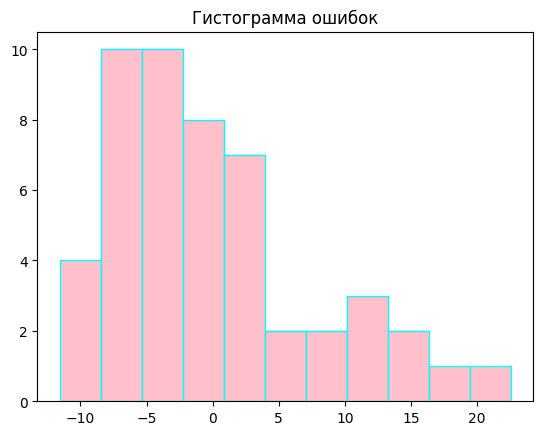

[ 4. 10. 10.  8.  7.  2.  2.  3.  2.  1.  1.]
Отклоняем гипотезу о нормальности ошибок, т.к. p_value (0.009) < alpha (0.2)
p_value по Калмагорову = 1.4771470797923573e-11


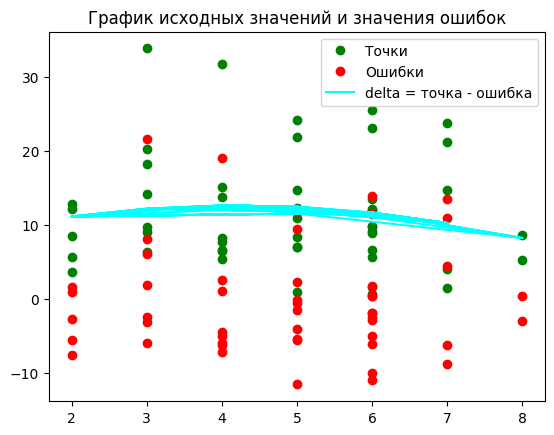

Визуально распределение ошибок очень значительно отличаются от нормального 
Также стоит отметить низкое значение p_value по Колмогорову (1.4771470797923573e-11)


In [40]:
s2 = np.dot((y - np.dot(x3.T, beta_list2)).T, (y - np.dot(x3.T, beta_list2))) / (len(y) - 3)
print(f'Оценка дисперсии s^2 = {round(s2,3)}')

errors = y - np.dot(x3.T, beta_list2)
bins_list = np.arange(min(errors), max(errors) + h, h)
hist = plt.hist(errors, bins=bins_list, edgecolor='aqua', color='pink')[0]
plt.title('Гистограмма ошибок')
plt.show()
print(hist)

chi2_stat, p_value = stats.normaltest(errors)

print(f'Отклоняем гипотезу о нормальности ошибок, т.к. p_value ({round(p_value, 3)}) < alpha ({alpha})') if p_value < alpha else print(f'Принимаем гипотезу о нормальности ошибок, т.к. p_value ({round(p_value, 3)}) >= alpha ({alpha})')

kstest_st, p_value = stats.kstest(errors, 'norm')
print(f'p_value по Калмагорову = {p_value}')
plt.plot(x, y, 'o', label='Точки', color='green')
plt.plot(x, errors, 'o', label='Ошибки', color='red')
delta = y-errors
plt.plot(x, delta, label='delta = точка - ошибка', color='aqua')
plt.legend()
plt.title('График исходных значений и значения ошибок')
plt.show()

print(f'Визуально распределение ошибок очень значительно отличаются от нормального \nТакже стоит отметить низкое значение p_value по Колмогорову ({p_value})')

### Задание 7
В предположении нормальности ошибок построить доверительные интервалы для параметров $(\beta_0, \ \beta_1, \ \beta_2)$  уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.


**Доверительный интервал:**
$\psi = C^T \beta  \\
\frac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} \\
x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} \to x_\alpha =  1.299\\
b_\psi = C^T (XX^T)^{-1}C \\
 P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

Искомый интервал: $ [\widehat \psi - x_{\alpha}s\sqrt{b} ; \widehat \psi + x_{\alpha}s\sqrt{b}] $

Расчет Д.И. $\beta_0$  

In [41]:
C = np.array([1, 0, 0])
psy = np.dot(C.T, beta_list2)
print(f'psy : {round(psy, 3)}')
x_a = stats.t(len(y) - 3).ppf(1-alpha/2)
print(f'x_a : {round(x_a, 3)}')
b_psy = np.dot(np.dot(C.T, np.linalg.inv(np.dot(x3, x3.T))), C)
print(f'b_psy : {round(b_psy, 3)}')

print(f'Искомый интервал: [{round(beta_list2[0]-x_a*np.sqrt(s2*b_psy), 3)}; {round(beta_list2[0]+x_a*np.sqrt(s2*b_psy),3)}]. \n1-alpha = {1-alpha}')

psy : 7.205
x_a : 1.3
b_psy : 1.19
Искомый интервал: [-3.705; 18.116]. 
1-alpha = 0.8


Расчет Д.И. $\beta_1$  

In [42]:
C = np.array([0, 1, 0])
psy = np.dot(C.T, beta_list2)
print(f'psy : {round(psy, 3)}')
x_a = stats.t(len(y) - 3).ppf(1-alpha/2)
print(f'x_a : {round(x_a, 3)}')
b_psy = np.dot(np.dot(C.T, np.linalg.inv(np.dot(x3, x3.T))), C)
print(f'b_psy : {round(b_psy, 3)}')

print(f'Искомый интервал: [{round(beta_list2[1]-x_a*np.sqrt(s2*b_psy), 3)}; {round(beta_list2[1]+x_a*np.sqrt(s2*b_psy),3)}]. \n1-alpha = {1-alpha}')

psy : 2.589
x_a : 1.3
b_psy : 0.235
Искомый интервал: [-2.262; 7.439]. 
1-alpha = 0.8


Расчет Д.И. $\beta_2$  

In [43]:
C = np.array([0, 0, 1])
psy = np.dot(C.T, beta_list2)
print(f'psy : {round(psy, 3)}')
x_a = stats.t(len(y) - 3).ppf(1-alpha/2)
print(f'x_a : {round(x_a, 3)}')
b_psy = np.dot(np.dot(C.T, np.linalg.inv(np.dot(x3, x3.T))), C)
print(f'b_psy : {round(b_psy, 3)}')

print(f'Искомый интервал: [{round(beta_list2[2]-x_a*np.sqrt(s2*b_psy), 3)}; {round(beta_list2[2]+x_a*np.sqrt(s2*b_psy),3)}]. \n1-alpha = {1-alpha}')

psy : -0.307
x_a : 1.3
b_psy : 0.003
Искомый интервал: [-0.812; 0.197]. 
1-alpha = 0.8


**Эллипс**

In [44]:
E_val, E_vec = np.linalg.eig(np.dot(x3, x3.T))
x_a = stats.f.ppf(1-alpha, 3, len(y)-3)
se_x = 3*s2*x_a/E_val[0]
se_y = 3*s2*x_a/E_val[1]
se_z   = 3*s2*x_a/E_val[2]

sep = 50*'_'

print(f'OX полуось = {se_x}')
print(f'OY полуось = {se_y}')
print(f'OZ полуось = {se_z}')
print(f'{sep}\nСобственные числа:\n {E_val}\n{sep}\nСобственные вектора:\n {E_vec}')

OX полуось = 0.0060445637037417855
OY полуось = 404.1956159659552
OZ полуось = 3.7148373232039993
__________________________________________________
Собственные числа:
 [4.72643874e+04 7.06817662e-01 7.69058173e+01]
__________________________________________________
Собственные вектора:
 [[-0.02803139 -0.91634785 -0.39940063]
 [-0.16192169  0.39844321 -0.902787  ]
 [-0.9864054  -0.03936525  0.15954551]]



$ \vec{x}= P(\hat{\psi} - \psi) =
\pmatrix{ -0.028 & -0.162 &  -0.986\\  -0.916 & 0.398 & -0.04 \\ -0.399 & -0.903 & 0.160 }
\pmatrix{ 7.205  - \beta_0 \\ 2.589 - \beta_1 \\ -0.307 - \beta_2 } =
\pmatrix{ -0.318 + 0.028\beta_0 + 0.162\beta_1 + 0.986\beta_2 \\
-5.557 + 0.916\beta_0 - 0.398\beta_1 + 0.04\beta_2 \\
-5.332 + 0.399\beta_0 + 0.93\beta_1 - 0.16\beta_2}$  

$ \frac{( -0.318 + 0.028\beta_0 + 0.162\beta_1 + 0.986\beta_2)^2}{0.006} +
 \frac{(-5.557 + 0.916\beta_0 - 0.398\beta_1 + 0.04\beta_2)^2}{404.195} +
  \frac{(-5.332 + 0.399\beta_0 + 0.93\beta_1 - 0.16\beta_2)^2}{3.715} \leq 1 $

### Задание 8
Сформулировать гипотезу линейной регрессинной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Применим F-критерий

$F=\frac{MSR}{MSE} \\ MSR - среднеквадратичное \ отклонение \ отклонение \\ MSE -  cреднеквадратичная \  ошибка $  

Высчитывается критическиое значение -  квантиль распределения Фишера с заданными степенями свободы для заданного уровня доверия

Если F превосходит найденный квантиль, то зависимость есть, иначе нет


In [45]:
MSE = np.sum((y - (beta_list2[0] + beta_list2[1] * x  + beta_list2[1] * x**2)) ** 2) / (len(y) - 3)
MSR = np.sum((beta_list[0] + beta_list[1] * x + beta_list2[1] * x**2 - np.mean(y)) ** 2) / 3

f_value = MSR / MSE
f_value_critical = stats.f.ppf(1 - alpha, 3, len(y) - 3)
print(f'Y зависит от X, т.к. f_value > f_value_critical ({round(f_value, 3)} > {round(f_value_critical, 3)})') if f_value > f_value_critical else print(f'Y не зависит от X, т.к. f_value < f_value_critical ({round(f_value, 3)}<{round(f_value_critical, 3)}) ')

Y зависит от X, т.к. f_value > f_value_critical (12.346 > 1.609)


## Выводы

В ходе выполнения лабораторной работы были получены теоретические знания о методе наименьших квадратов, а также практические навыки работы с МНК, функцией регрессии и регрессионным анализом.  
Был исследованы методы регрессионного анализа, такие как построение линейной и квадратичной регрессионных моеделей. Проведен анализ нормальности ошибок, построение доверительных интервалов и эллипсов. Кроме того, оценено расстояние до нормального распределения с использованием критерия Колмогорова и проверена гипотеза о зависимость переменных Y и X.  
Рассмотрены несмещённая оценка дисперсии $s^{2}$ и критерий $\chi^2$ для проверки гипотез. Все эти элементы позволяют проводить статистические выводы о параметрах модели и их значимости.